# Multiple Results Analysis

This notebook is intended to read a simulation results file with multiple simulations and results and create aggregate analyses and visualizations.

In [1]:
%matplotlib inline

import os
import sys 
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from operator import itemgetter
from itertools import groupby, chain
from collections import defaultdict, Counter

# Modify the Notebook path
sys.path.append(os.path.join(os.getcwd(), ".."))

import cloudscope.results.graph as gt

from cloudscope.results import Results
from cloudscope.results.analysis import create_per_replica_dataframe as create_replica_dataframe
from cloudscope.results.analysis import create_per_experiment_dataframe as create_dataframe
from cloudscope.results.analysis import results_values as rvals

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
sns.set_style('whitegrid')
sns.set_context('poster')

In [3]:
# Specify a path to a results file 
# If None, will attempt to look one up
FIXTURES = os.path.join("..", "fixtures", "results")
RESULTS  = os.path.join(FIXTURES, "federated-multi-original-1user-bailis.json")

def get_results_data(path=RESULTS):
    with open(path, 'r') as f:
        data = json.load(f)
    
    for result in data:
        yield Results(**result)

# Load the data
results = list(get_results_data())

In [4]:
# Print report details 
def report_settings(exclude=None):
    table = defaultdict(dict)
    exclude = exclude or frozenset([
        'valid_locations', 'invalid_types', 
        'default_replica', 'default_consistency', 'default_latency', 
        'max_sim_time', 'title', 'description',
        'election_timeout', 'heartbeat_interval',
    ])
    
    for idx, conf in enumerate(rvals(results, 'settings')):
        eid = "e{:0>2}".format(idx)
        table[eid]['name'] = eid
        for key, val in conf.iteritems():
            if key in exclude: continue
            table[eid][key] = val
    
    for idx, conf in enumerate(rvals(results, 'topology', 'meta')):
        eid = "e{:0>2}".format(idx)
        for key, val in conf.iteritems():
            if key in exclude: continue
            table[eid][key] = val

    return pd.DataFrame(table.values())

report_settings()

,access_mean,access_stddev,aggregate_heartbeats,aggregate_writes,anti_entropy_delay,constant,count_messages,do_gossip,do_rumoring,integration,...,read_prob,seed,session_timeout,switch_prob,sync_prob,synchronous_access,tick_metric,type,users,variable
0,1200,180,True,True,6575,N/A ms,True,True,False,federated,...,0.58,42,40960,0.1,0.3,False,26300,federated,1,N/A-N/Ams
1,1200,180,True,True,3450,N/A ms,True,True,False,federated,...,0.58,42,40960,0.1,0.3,False,13800,raft,1,N/A-N/Ams
2,1200,180,True,True,4075,N/A ms,True,True,False,federated,...,0.58,42,40960,0.1,0.3,False,16300,raft,1,N/A-N/Ams
3,1200,180,True,True,4700,N/A ms,True,True,False,federated,...,0.58,42,40960,0.1,0.3,False,18800,federated,1,N/A-N/Ams
4,1200,180,True,True,4075,N/A ms,True,True,False,federated,...,0.58,42,40960,0.1,0.3,False,16300,federated,1,N/A-N/Ams
5,1200,180,True,True,7200,N/A ms,True,True,False,federated,...,0.58,42,40960,0.1,0.3,False,28800,raft,1,N/A-N/Ams
6,1200,180,True,True,6575,N/A ms,True,True,False,federated,...,0.58,42,40960,0.1,0.3,False,26300,raft,1,N/A-N/Ams
7,1200,180,True,True,5950,N/A ms,True,True,False,federated,...,0.58,42,40960,0.1,0.3,False,23800,raft,1,N/A-N/Ams
8,1200,180,True,True,5325,N/A ms,True,True,False,federated,...,0.58,42,40960,0.1,0.3,False,21300,raft,1,N/A-N/Ams
9,1200,180,True,True,4700,N/A ms,True,True,False,federated,...,0.58,42,40960,0.1,0.3,False,18800,raft,1,N/A-N/Ams


In [5]:
df = create_dataframe(results)
df = df.fillna(0)
df

,T parameter model,anti-entropy delay (ms),committed writes,completed reads,completed writes,dropped write latency,dropped writes,eid,"election timeout (ms, ms)",empty reads,...,reads,recv,sent,stale reads,standard deviation of latency (ms),tick metric (T),type,users,visible writes,writes
0,bailis,325,0,2099,1481,0,0,e00,"[1300, 2600]",12,...,2111,531664,531675,738,50,1300,eventual,1,5,1481
1,bailis,950,0,2084,1481,0,0,e01,"[3800, 7600]",27,...,2111,181868,181874,728,50,3800,eventual,1,0,1481
2,bailis,1575,0,2095,1481,0,0,e02,"[6300, 12600]",16,...,2111,109679,109680,768,50,6300,eventual,1,1,1481
3,bailis,2200,0,2087,1481,0,0,e03,"[8800, 17600]",24,...,2111,78512,78520,710,50,8800,eventual,1,3,1481
4,bailis,2825,0,2103,1481,0,0,e04,"[11300, 22600]",8,...,2111,61142,61151,724,50,11300,eventual,1,4,1481
5,bailis,3450,0,2090,1481,0,0,e05,"[13800, 27600]",21,...,2111,50060,50070,765,50,13800,eventual,1,0,1481
6,bailis,4075,0,2088,1481,0,0,e06,"[16300, 32600]",23,...,2111,42378,42389,760,50,16300,eventual,1,2,1481
7,bailis,4700,0,2097,1481,0,0,e07,"[18800, 37600]",14,...,2111,36750,36755,788,50,18800,eventual,1,1,1481
8,bailis,5325,0,2098,1481,0,0,e08,"[21300, 42600]",13,...,2111,32432,32436,807,50,21300,eventual,1,0,1481
9,bailis,5950,0,2092,1481,0,0,e09,"[23800, 47600]",19,...,2111,29024,29032,819,50,23800,eventual,1,0,1481


In [6]:
print("\n".join(df.columns))

T parameter model
anti-entropy delay (ms)
committed writes
completed reads
completed writes
dropped write latency
dropped writes
eid
election timeout (ms, ms)
empty reads
heartbeat interval (ms)
latency range (ms)
mean commit latency (ms)
mean latency (ms)
mean message latency (ms)
mean read latency (ms)
mean visibility latency (ms)
mean write latency (ms)
message types
reads
recv
sent
stale reads
standard deviation of latency (ms)
tick metric (T)
type
users
visible writes
writes


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


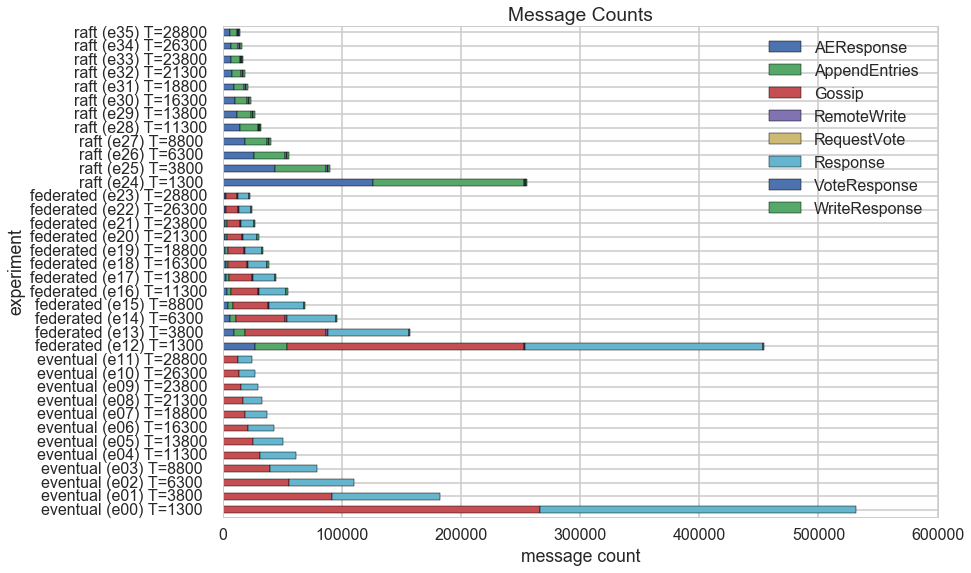

In [7]:
def get_message_rows(df):
    for row in df[['message types', 'tick metric (T)', 'type', 'eid']].itertuples(): 
        item = row[1]
        item['experiment'] = "{} ({}) T={: <6}".format(row[3], row[4], row[2])
        yield item

msgs = pd.DataFrame(get_message_rows(df))

plt.figure(figsize=(14,14))
mpl.rcParams.update({'font.size': 22})

axe = msgs.plot(x='experiment', kind='barh', stacked=True, color=sns.color_palette())
axe.set_xlabel("message count")
plt.title("Message Counts")

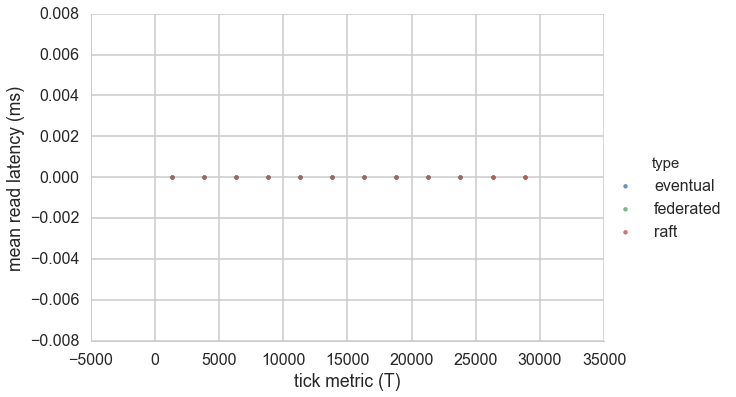

In [8]:
ax = sns.lmplot(
    x="tick metric (T)", y="mean read latency (ms)", hue='type', 
    data=df, fit_reg=False, size=6, aspect=1.5,
)

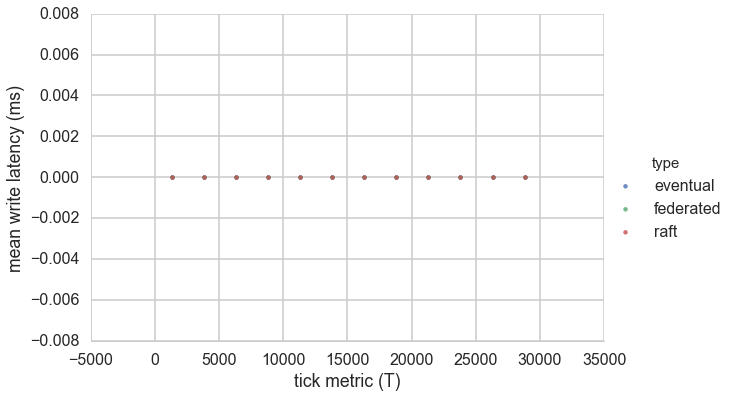

In [9]:
ax = sns.lmplot(
    x="tick metric (T)", y="mean write latency (ms)", hue='type', 
    data=df, fit_reg=False, size=6, aspect=1.5,
)

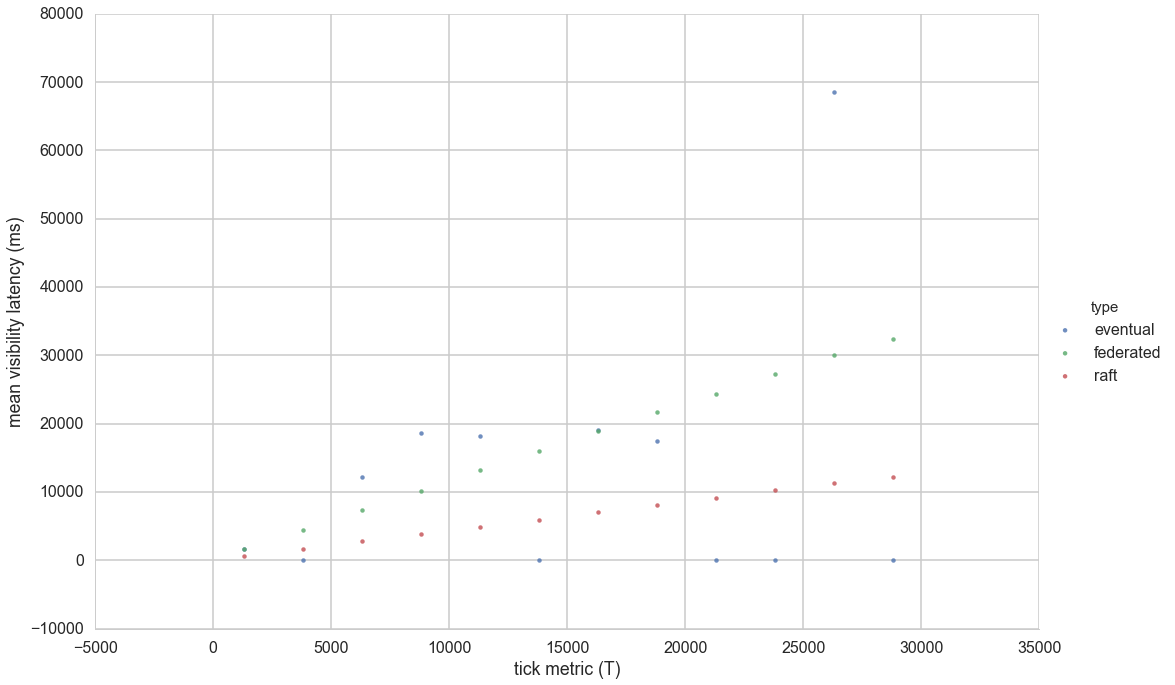

In [10]:
ax = sns.lmplot(
    x="tick metric (T)", y="mean visibility latency (ms)", hue='type', 
    data=df, fit_reg=False, size=10, aspect=1.5
)

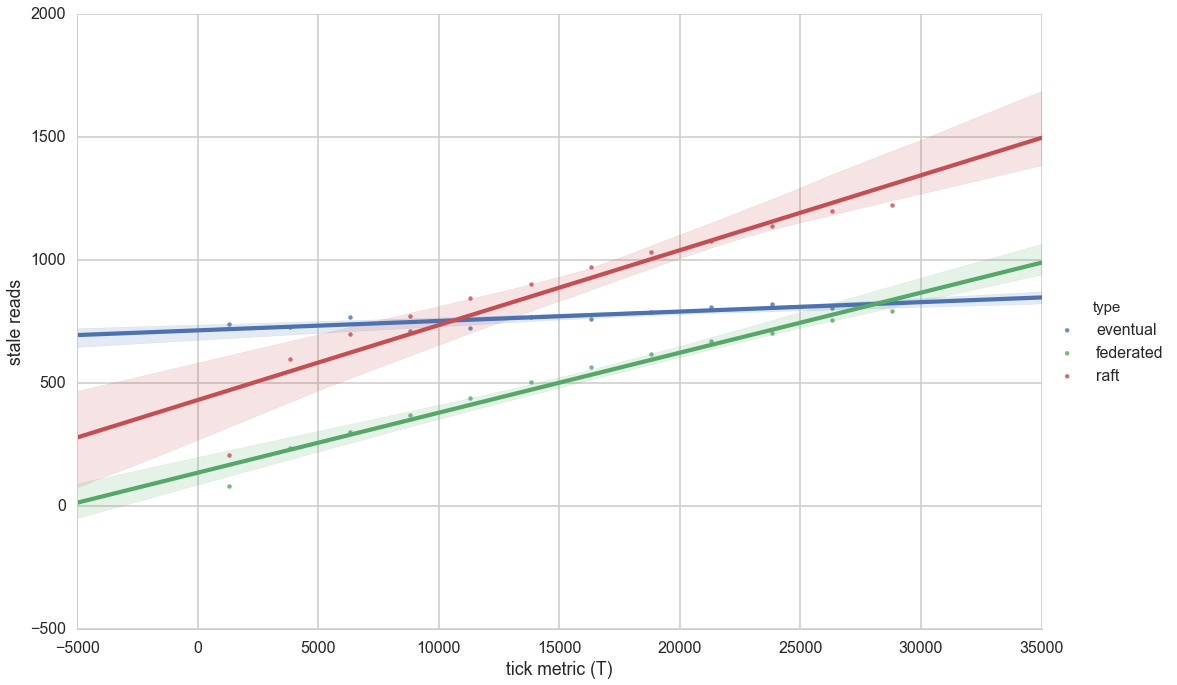

In [11]:
ax = sns.lmplot(
    x="tick metric (T)", y="stale reads", hue='type', 
    data=df, fit_reg=True, size=10, aspect=1.5
)

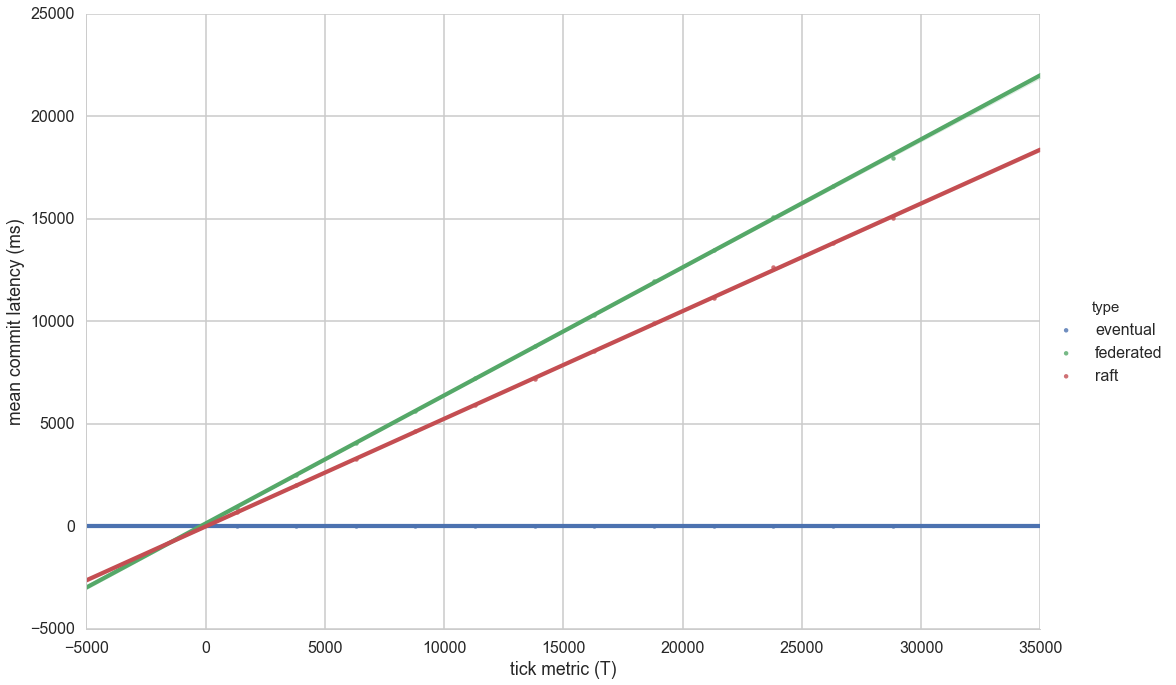

In [12]:
ax = sns.lmplot(
    x="tick metric (T)", y="mean commit latency (ms)", hue='type', 
    data=df, fit_reg=True, size=10, aspect=1.5
)